# 이미지 증강(Image Augmentation)
---
- tensorflow
- 텐서플로우 최신버전 설치

In [1]:
# !pip install tensorflow==2.11.0

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz

--2023-01-10 02:13:15--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.250.4.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M  15.6MB/s    in 16s     

2023-01-10 02:13:33 (14.1 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



In [4]:
!tar -xvzf flower_photos.tgz

flower_photos/
flower_photos/roses/
flower_photos/roses/14810868100_87eb739f26_m.jpg
flower_photos/roses/1446090416_f0cad5fde4.jpg
flower_photos/roses/15319767030_e6c5602a77_m.jpg
flower_photos/roses/15032112248_30c5284e54_n.jpg
flower_photos/roses/7211616670_2d49ecb3a5_m.jpg
flower_photos/roses/15674450867_0ced942941_n.jpg
flower_photos/roses/17158274118_00ec99a23c.jpg
flower_photos/roses/14019883858_e5d2a0ec10_n.jpg
flower_photos/roses/8035908422_87220425d2_n.jpg
flower_photos/roses/14747962886_2bff6bb323_m.jpg
flower_photos/roses/4356781875_92c5cd93c0.jpg
flower_photos/roses/8524505546_b242bd4928_n.jpg
flower_photos/roses/9406573080_60eab9278e_n.jpg
flower_photos/roses/6039330368_c30ed224c4_m.jpg
flower_photos/roses/14414100710_753a36fce9.jpg
flower_photos/roses/3292434691_392071d702_n.jpg
flower_photos/roses/5273722065_c85d8543c2_m.jpg
flower_photos/roses/2215318403_06eb99176a.jpg
flower_photos/roses/172311368_49412f881b.jpg
flower_photos/roses/15255964454_0a64eb67fa.jpg
flower_pho

In [5]:
import pathlib

data_dir = pathlib.Path('/content/flower_photos')

In [6]:
type(data_dir)

pathlib.PosixPath

In [7]:
fnames = list(data_dir.glob('roses/*.jpg')) # */*는 모든 디렉토리, .jpg의 확장자를 가진것을 가져온다
fnames[0]

PosixPath('/content/flower_photos/roses/6105809987_8f3d7a8d67_n.jpg')

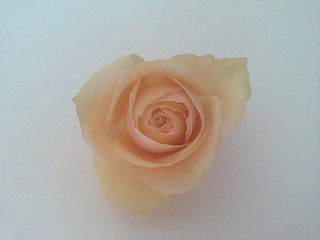

In [8]:
import PIL
import PIL.Image

PIL.Image.open(fnames[0])

### Dataset 객체

In [9]:
image_size = (180, 180)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'training',
    image_size = image_size,
    batch_size = batch_size,
    seed = 2022
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [10]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    image_size = image_size,
    batch_size = batch_size,
    seed = 2022
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [12]:
def build_model_1():
  model = keras.Sequential([
      layers.Conv2D(32, 3, activation='relu', input_shape = (180, 180, 3)),
      # 32, (3, 3)이라고 적어도 됨. 32, 3하면 자동적으로 32, (3, 3)들어감.
      # padding ='same'은 입력된 이미지와 출력된 이미지의 크기를 같게해준다.
      layers.MaxPool2D(2),
      layers.Conv2D(64, 3, activation='relu'),
      layers.MaxPool2D(2),
      layers.Conv2D(128, 3, activation='relu'),
      layers.MaxPool2D(2),
      layers.Conv2D(128, 3, activation='relu'),
      layers.MaxPool2D(2),
      layers.Flatten(),
      layers.Dropout(0.3),
      layers.Dense(256, activation='relu'),
      layers.Dense(5, activation='sigmoid')
  ])

  model.compile(
      optimizer = 'adam',
      loss = 'sparse_categorical_crossentropy', # sparse_를 붙이면 y를 원핫인코딩을 하지 않아도 내부적으로 원핫인코딩을 하여 계산한다.
      metrics = ['acc']
       )
  
  return model

In [13]:
model = build_model_1()
model.fit(train_ds,
          epochs=30,
          validation_data=val_ds,
          verbose=1)

Epoch 1/30
92/92 [==============================] - 15s 53ms/step - loss: 8.1513 - acc: 0.2599 - val_loss: 1.5843 - val_acc: 0.2725
Epoch 2/30
92/92 [==============================] - 4s 44ms/step - loss: 1.5599 - acc: 0.2653 - val_loss: 1.5628 - val_acc: 0.2943
Epoch 3/30
92/92 [==============================] - 4s 44ms/step - loss: 1.5365 - acc: 0.3048 - val_loss: 1.6045 - val_acc: 0.2452
Epoch 4/30
92/92 [==============================] - 4s 44ms/step - loss: 1.4763 - acc: 0.3334 - val_loss: 1.4436 - val_acc: 0.3842
Epoch 5/30
92/92 [==============================] - 4s 44ms/step - loss: 1.3693 - acc: 0.4152 - val_loss: 1.4816 - val_acc: 0.3488
Epoch 6/30
92/92 [==============================] - 4s 44ms/step - loss: 1.3240 - acc: 0.4530 - val_loss: 1.3405 - val_acc: 0.4728
Epoch 7/30
92/92 [==============================] - 4s 44ms/step - loss: 1.0975 - acc: 0.5528 - val_loss: 1.1435 - val_acc: 0.5627
Epoch 8/30
92/92 [==============================] - 4s 44ms/step - loss: 0.9913 - 

In [14]:
model.evaluate(val_ds)

23/23 [==============================] - 1s 20ms/step - loss: 2.2752 - acc: 0.6294


[2.2751874923706055, 0.6294277906417847]

In [15]:
for images, labels in train_ds.take(1):
  print(len(images))
  print(len(labels))

32
32


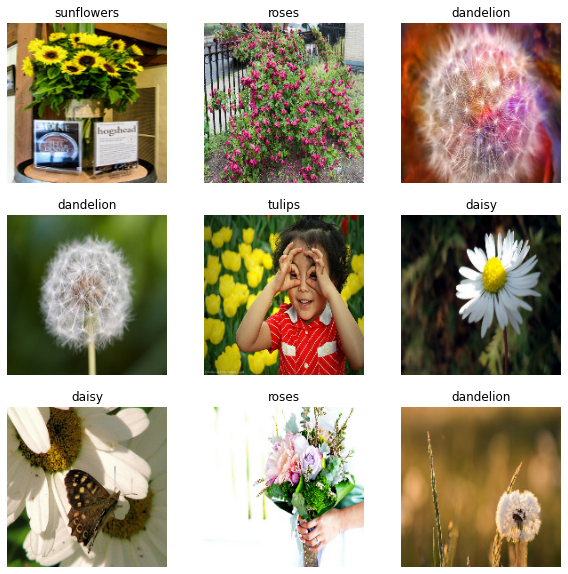

In [16]:
for images, labels in train_ds.take(1):
  plt.figure(figsize = (10,10))
  for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype('int'))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis('off')

### 성능을 위한 설정

In [17]:
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
# cache 한번 메모리에 로딩되면 캐싱해놨다가 다음 학습때 캐싱된 데이터를 가져옴.
# prefetch 그 다음 학습할 데이터를 하드디스크에서 미리 불러온다.
# tf.data.AUTOTUNE PC의 성능에 맞춰 설정한다.

### 이미지 증강

In [18]:
data_augmen = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1)
])

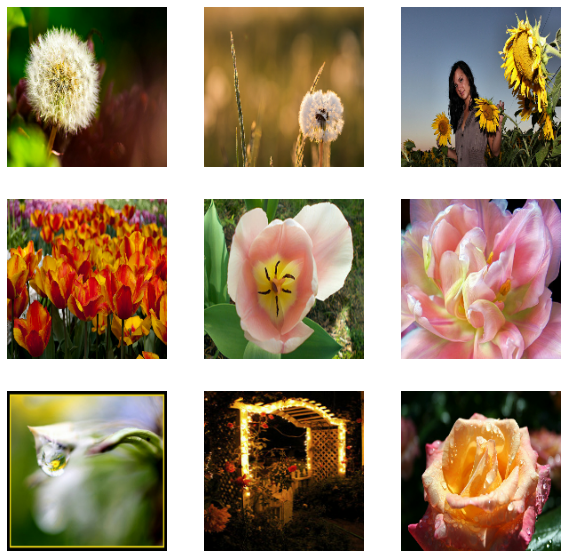

In [19]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
   for i in range(9):
      augmented_images = data_augmen(images)
      plt.subplot(3, 3, i+1)
      plt.imshow(augmented_images[i].numpy().astype('int'))
      plt.axis('off')
   plt.show()

In [20]:
data_augmen = keras.Sequential([
    layers.Rescaling(1./255.),
    layers.Resizing(180, 180),
    layers.RandomFlip('horizontal'),
    layers.RandomFlip('vertical'),
    layers.RandomRotation(0.5)
])

train_ds = train_ds.map(
    lambda img, label: (data_augmen(img), label),
    num_parallel_calls = tf.data.AUTOTUNE # augmentation이 하나하나 다 할경우 시간을 많이 잡아먹기 때문에, 빠르게 처리하기 위해서 평행화한다.
)

val_ds = val_ds.map(
    lambda img, label: (data_augmen(img), label),
    num_parallel_calls = tf.data.AUTOTUNE # augmentation이 하나하나 다 할경우 시간을 많이 잡아먹기 때문에, 빠르게 처리하기 위해서 평행화한다.
)

In [21]:
def build_model_1():
  model = keras.Sequential([
      layers.Conv2D(32, 3, activation='relu', input_shape = (180, 180, 3)),
      # 32, (3, 3)이라고 적어도 됨. 32, 3하면 자동적으로 32, (3, 3)들어감.
      # padding ='same'은 입력된 이미지와 출력된 이미지의 크기를 같게해준다.
      layers.MaxPool2D(2),
      layers.Conv2D(64, 3, activation='relu'),
      layers.MaxPool2D(2),
      layers.Conv2D(128, 3, activation='relu'),
      layers.MaxPool2D(2),
      layers.Conv2D(128, 3, activation='relu'),
      layers.MaxPool2D(2),
      layers.Flatten(),
      layers.Dropout(0.3),
      layers.Dense(256, activation='relu'),
      layers.Dense(5, activation='sigmoid')
  ])

  model.compile(
      optimizer = 'adam',
      loss = 'sparse_categorical_crossentropy', # sparse_를 붙이면 y를 원핫인코딩을 하지 않아도 내부적으로 원핫인코딩을 하여 계산한다.
      metrics = ['acc']
       )
  
  return model

In [22]:
model = build_model_1()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 20, 20, 128)     

In [23]:
EPOCHS = 10

log = model.fit(train_ds,
                epochs = EPOCHS,
                validation_data = val_ds,
                verbose = 1)

Epoch 1/10
92/92 [==============================] - 5s 44ms/step - loss: 1.3611 - acc: 0.4087 - val_loss: 1.0858 - val_acc: 0.5886
Epoch 2/10
92/92 [==============================] - 4s 40ms/step - loss: 1.0861 - acc: 0.5668 - val_loss: 0.9630 - val_acc: 0.6226
Epoch 3/10
92/92 [==============================] - 4s 40ms/step - loss: 0.9317 - acc: 0.6322 - val_loss: 0.8729 - val_acc: 0.6553
Epoch 4/10
92/92 [==============================] - 4s 40ms/step - loss: 0.8042 - acc: 0.6907 - val_loss: 0.7986 - val_acc: 0.6839
Epoch 5/10
92/92 [==============================] - 4s 40ms/step - loss: 0.7138 - acc: 0.7313 - val_loss: 0.8978 - val_acc: 0.6730
Epoch 6/10
92/92 [==============================] - 4s 40ms/step - loss: 0.6304 - acc: 0.7606 - val_loss: 0.9224 - val_acc: 0.6785
Epoch 7/10
92/92 [==============================] - 4s 40ms/step - loss: 0.5501 - acc: 0.7933 - val_loss: 0.8987 - val_acc: 0.6798
Epoch 8/10
92/92 [==============================] - 4s 40ms/step - loss: 0.5025 - a